In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
from sklearn.neighbors import NearestNeighbors

Check paths

In [2]:
HOME = os.getcwd()
print('HOME: ', HOME)

DATASET = os.path.join(HOME, r'data\shopping_trends.csv')
print('DATASET: ', DATASET)

HOME:  d:\Data Science Programming\External_Projects\Shopping Trend Statistics
DATASET:  d:\Data Science Programming\External_Projects\Shopping Trend Statistics\data\shopping_trends.csv


Loading and understanding data

In [3]:
shopping_trend_df = pd.read_csv(DATASET)
shopping_trend_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [4]:
shopping_trend_df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_2764\662297067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='plasma')


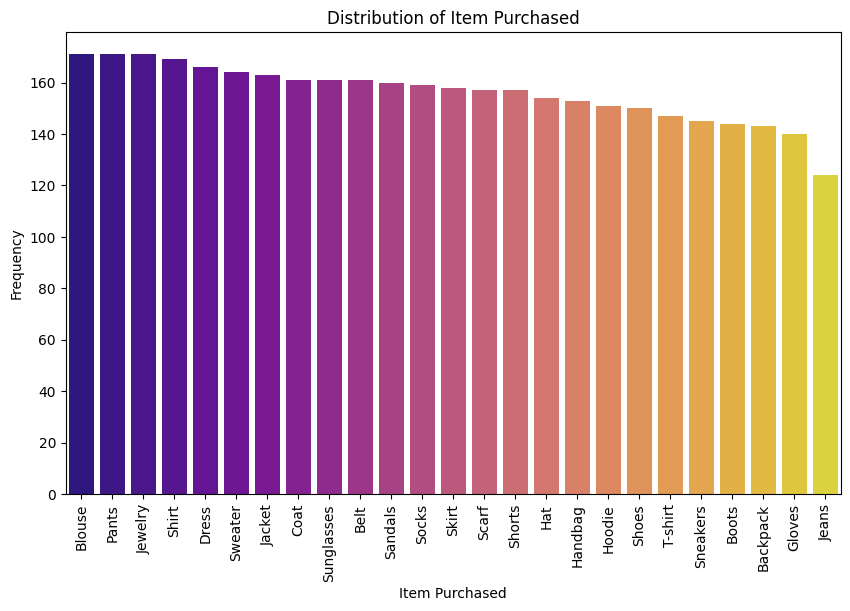

In [5]:
item_counts = shopping_trend_df['Item Purchased'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette='plasma')
plt.title('Distribution of Item Purchased')
plt.xlabel('Item Purchased')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [6]:
shopping_trend_df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_2764\3372936017.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


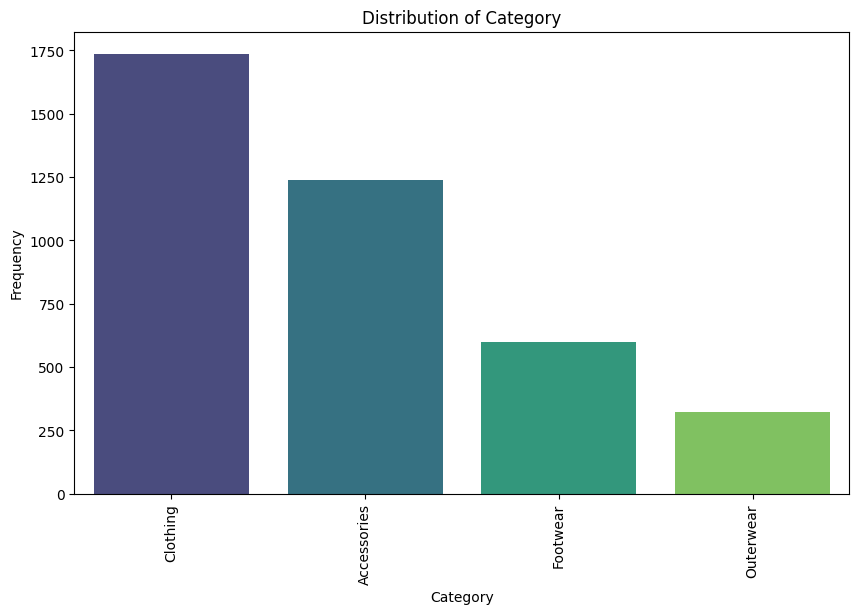

In [7]:
category_counts = shopping_trend_df['Category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

The plot indicates the most people buy Clothing more than something else

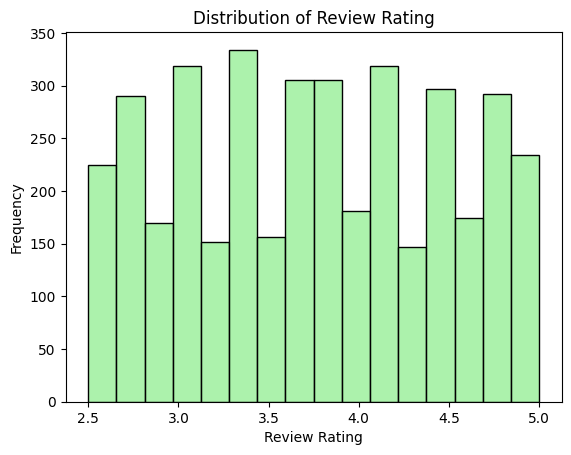

In [8]:
sns.histplot(shopping_trend_df['Review Rating'], color='lightgreen')
plt.title('Distribution of Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.show()

In [9]:
shopping_trend_df['Size'].unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_2764\2372290663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_distribute.index, y=size_distribute.values, palette='plasma')


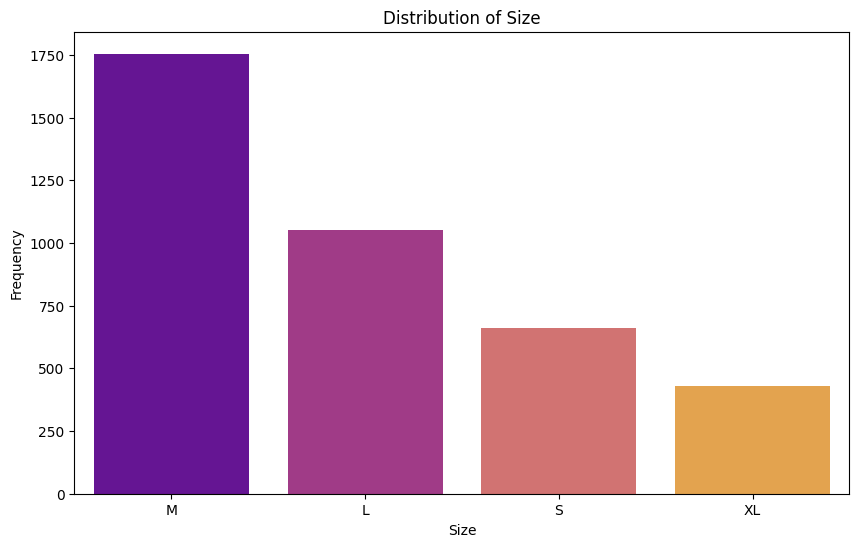

In [10]:
size_distribute = shopping_trend_df['Size'].value_counts()

# Vẽ biểu đồ thanh với matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=size_distribute.index, y=size_distribute.values, palette='plasma')
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

In [11]:
shopping_trend_df['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_2764\2637583251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_distribute.index, y=color_distribute.values, palette='viridis')


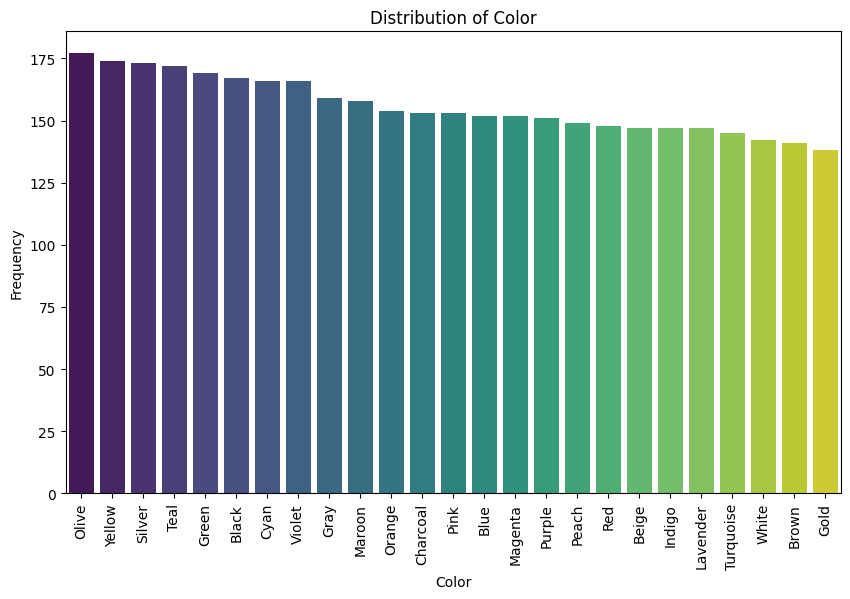

In [12]:
color_distribute = shopping_trend_df['Color'].value_counts()

# Vẽ biểu đồ thanh với matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=color_distribute.index, y=color_distribute.values, palette='viridis')
plt.title('Distribution of Color')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_2764\715573205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_distribute.index, y=season_distribute.values, palette='plasma')


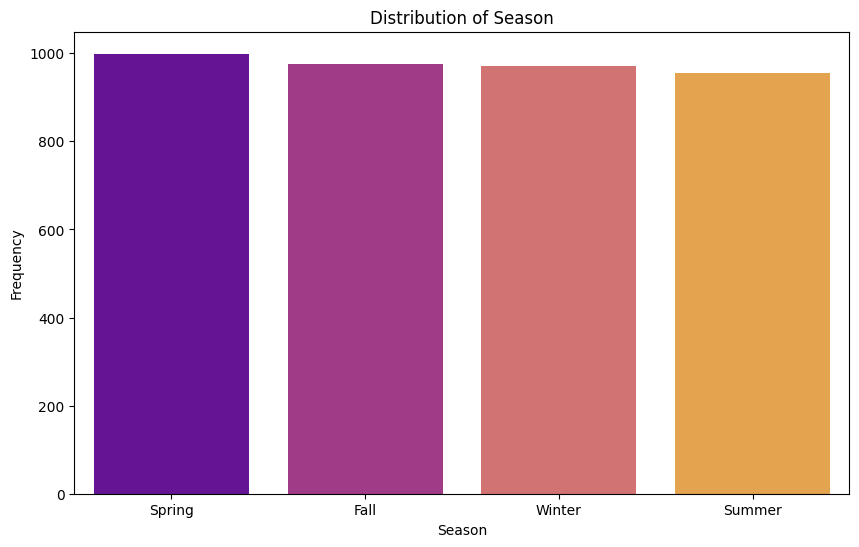

In [13]:
season_distribute = shopping_trend_df['Season'].value_counts()

# Vẽ biểu đồ thanh với matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=season_distribute.index, y=season_distribute.values, palette='plasma')
plt.title('Distribution of Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()

Encode non-numeric columns as 'Category', 'Size', 'Color', 'Season'

In [ ]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(shopping_trend_df[['Category', 'Size', 'Color', 'Season']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
encoded_df

,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,Item Purchased_Gloves,Item Purchased_Handbag,Item Purchased_Hat,Item Purchased_Hoodie,...,Color_Silver,Color_Teal,Color_Turquoise,Color_Violet,Color_White,Color_Yellow,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3897,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Nearest Neighbors Model
neighbors = NearestNeighbors(n_neighbors=5, metric='cosine')
neighbors.fit(encoded_df)

# Recommend similar items for the first product
distances, indices = neighbors.kneighbors([encoded_df.iloc[0]])
print("Recommended Items:")
print(shopping_trend_df.iloc[indices[0]])

Recommended Items:
      Customer ID  Age  Gender Item Purchased  Category  \
0               1   55    Male         Blouse  Clothing   
3107         3108   65  Female         Blouse  Clothing   
865           866   64    Male         Blouse  Clothing   
1215         1216   66    Male         Blouse  Clothing   
2160         2161   45    Male         Blouse  Clothing   

      Purchase Amount (USD)       Location Size     Color  Season  \
0                        53       Kentucky    L      Gray  Winter   
3107                     31         Hawaii    L      Gray  Winter   
865                      26       Colorado    L  Charcoal  Winter   
1215                     20         Oregon    L      Pink  Winter   
2160                     92  West Virginia    L  Charcoal  Winter   

      Review Rating Subscription Status Payment Method   Shipping Type  \
0               3.1                 Yes    Credit Card         Express   
3107            4.6                  No     Debit Card        S

c:\Users\MINH HUNG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
